## __Enhancing Healthcare Accessibility in Nairobi, Kenya__

Nairobi City is home to a diverse and rapidly growing population. As the city expands, ensuring equitable access to healthcare services becomes increasingly challenging yet critical for sustainable urban development.

Geographic accessibility to healthcare facilities is a fundamental component of an effective healthcare system, influencing health outcomes, disease prevention, and population well-being. 

This project aims to explore the geographic distribution of healthcare facilities across Nairobi, identifying areas where accessibility may be limited and proposing recommendations to address these gaps.

## 1. Data Loading and Preprocessing

We are provided with datasets on health facilities and population Census (2019). We first explore the datasets before formulating a hypothesis.

In [246]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

#### Dataset1: Health Facilities
The Facilities data was obtained from the link. It initially contained __10505__ observations(rows) and __50__ variables (columns).

The columns contain health facilities data, their specific location details, contact information, and other details related to their services and operations.

We proceed with Nairobi data only as it is the main focus of this case: __942__ observations 

In [247]:
#import  dataset1
facilities = pd.read_excel("C:\\Users\\Sharon\\Desktop\\DDI\\ehealth-kenya-facilities-download-21102015.xls")
facilities.head(5)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
facilities.shape

(10505, 50)

In [249]:
# Filter for Nairobi data
df_nairobi = facilities[facilities['County'] == 'Nairobi']
df_nairobi.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13043,7Kr Mrs Health Centre,Nairobi,Nairobi,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,20346,AAR Adams Health Centre,Nairobi,Nairobi,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,Woodly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12861,AAR City Centre Clinic,Nairobi,Nairobi,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,16796,AAR Clinic Sarit Centre (Westlands),Nairobi,Nairobi,Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,Upper Parklands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
df_nairobi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 1 to 10496
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            942 non-null    int64  
 1   Facility Name            942 non-null    object 
 2   Province                 942 non-null    object 
 3   County                   942 non-null    object 
 4   District                 942 non-null    object 
 5   Division                 914 non-null    object 
 6   Type                     942 non-null    object 
 7   Owner                    942 non-null    object 
 8   Location                 894 non-null    object 
 9   Sub Location             672 non-null    object 
 10  Description of Location  641 non-null    object 
 11  Constituency             942 non-null    object 
 12  Nearest Town             824 non-null    object 
 13  Beds                     942 non-null    float64
 14  Cots                     942 

In [251]:
df_nairobi.columns

Index(['Facility Code', 'Facility Name', 'Province', 'County', 'District',
       'Division', 'Type', 'Owner', 'Location', 'Sub Location',
       'Description of Location', 'Constituency', 'Nearest Town', 'Beds',
       'Cots', 'Official Landline', 'Official Fax', 'Official Mobile',
       'Official Email', 'Official Address', 'Official Alternate No', 'Town',
       'Post Code', 'In Charge', 'Job Title of in Charge', 'Open 24 Hours',
       'Open Weekends', 'Operational Status', 'ANC', 'ART', 'BEOC', 'BLOOD',
       'CAES SEC', 'CEOC', 'C-IMCI', 'EPI', 'FP', 'GROWM', 'HBC', 'HCT', 'IPD',
       'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG',
       'TB LABS', 'TB TREAT', 'YOUTH'],
      dtype='object')

Of the 50 columns, only __12__ columns deemed necessary to carry on with the analysis.

In [252]:
# Necessary columns
df_nairobi = df_nairobi[['Facility Code', 'Facility Name','County', 'District',
       'Type', 'Owner', 'Constituency', 'Beds',
       'Cots','Open 24 Hours', 'Open Weekends', 'Operational Status']]
print(df_nairobi.shape)
df_nairobi.head()

(942, 12)


,Facility Code,Facility Name,County,District,Type,Owner,Constituency,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status
1,19310,St Jude's Huruma Community Health Services,Nairobi,Mathare,Medical Clinic,Private Practice - Unspecified,MATHARE,0.0,0.0,N,Y,Operational
7,13043,7Kr Mrs Health Centre,Nairobi,Langata,Health Centre,Armed Forces,LANG'ATA,14.0,0.0,Y,Y,Operational
10,20346,AAR Adams Health Centre,Nairobi,Kibra,Medical Clinic,Private Practice - General Practitioner,KIBRA,0.0,0.0,N,Y,Operational
11,12861,AAR City Centre Clinic,Nairobi,Starehe,Medical Clinic,Private Enterprise (Institution),STAREHE,0.0,0.0,N,Y,Operational
12,16796,AAR Clinic Sarit Centre (Westlands),Nairobi,Westlands,Medical Clinic,Private Enterprise (Institution),WESTLANDS,0.0,0.0,N,N,Operational


In [253]:
# Check for duplicates
df_nairobi.duplicated().any()

False

In [254]:
# missing values
df_nairobi.isnull().sum()

Facility Code          0
Facility Name          0
County                 0
District               0
Type                   0
Owner                  0
Constituency           0
Beds                   0
Cots                   0
Open 24 Hours         11
Open Weekends          9
Operational Status     0
dtype: int64

Cleaning the constituency column.

In [255]:

df_nairobi.loc[:, 'Constituency'] = df_nairobi['Constituency'].str.title()
df_nairobi.loc[:, 'Constituency'] = df_nairobi['Constituency'].str.replace("Lang'Ata", "Lang'ata")
df_nairobi.head()


,Facility Code,Facility Name,County,District,Type,Owner,Constituency,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status
1,19310,St Jude's Huruma Community Health Services,Nairobi,Mathare,Medical Clinic,Private Practice - Unspecified,Mathare,0.0,0.0,N,Y,Operational
7,13043,7Kr Mrs Health Centre,Nairobi,Langata,Health Centre,Armed Forces,Lang'ata,14.0,0.0,Y,Y,Operational
10,20346,AAR Adams Health Centre,Nairobi,Kibra,Medical Clinic,Private Practice - General Practitioner,Kibra,0.0,0.0,N,Y,Operational
11,12861,AAR City Centre Clinic,Nairobi,Starehe,Medical Clinic,Private Enterprise (Institution),Starehe,0.0,0.0,N,Y,Operational
12,16796,AAR Clinic Sarit Centre (Westlands),Nairobi,Westlands,Medical Clinic,Private Enterprise (Institution),Westlands,0.0,0.0,N,N,Operational


#### Dataset2: Kenya Population and Housing
The Census data contains the sub-county level population for males, females, intersex, and the total count.

We only extract data for the Nairobi sub-counties to proceed with.

In [256]:
pop = pd.read_csv("C:\\Users\\Sharon\\Downloads\\kenya-population-by-sub-county.csv")
pop.head()

,Sub-county,Male,Female,Intersex,Total,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Kenya,23548056,24014716,1524.0,47564296,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mombasa,610257,598046,30.0,1208333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Changamwe,68761,63121,NaN,131882,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jomvu,83002,80410,3.0,163415,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kisauni,146748,145176,6.0,291930,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
#only 5 columns contain important information
pop = pop[['Sub-county', 'Male', 'Female', 'Intersex', 'Total']]

In [258]:
# get rid of whitespaces in the subcounty values
pop.loc[:, 'Sub-county'] = pop['Sub-county'].str.strip()

In [259]:
# nairobi subcounties data
nairobi_subcounties = ['Dagoretti', 'Embakasi',	'Kamukunji', 'Kasarani', 'Kibra', "Lang'ata", 
                       'Makadara','Mathare','Njiru', 'Starehe', 'Westlands']
pop2 = pop[pop['Sub-county'].isin(nairobi_subcounties)]
pop2

,Sub-county,Male,Female,Intersex,Total
382,Dagoretti,217651,216526,31.0,434208
383,Embakasi,492476,496270,62.0,988808
384,Kamukunji,136670,131599,7.0,268276
385,Kasarani,381234,399385,37.0,780656
386,Kibra,94199,91569,9.0,185777
387,Lang'ata,96698,100774,17.0,197489
388,Makadara,96369,93157,10.0,189536
389,Mathare,106522,100028,14.0,206564
390,Njiru,307642,318809,31.0,626482
391,Starehe,109173,101238,12.0,210423


## 2. Exploratory Data Analysis (EDA)

From the data we observe that:
- Most subcounties atleast have more than __30__ health facilities.
- There is relatively high number of health facilities in Starehe while constituencies like Embakasi North and Mathare have lower than __20__ facilities


<Figure size 1600x800 with 0 Axes>

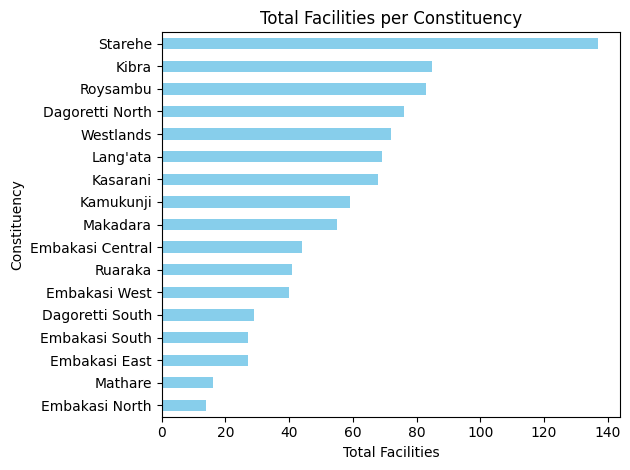

In [260]:
# summary of Health Facilties per Constituency
constituency = df_nairobi.groupby('Constituency').agg({'Facility Code': 'count'}).reset_index()
constituency.columns = ['Constituency', 'Total Facilities' ]
constituency_sorted=constituency.sort_values(by='Total Facilities', ascending=True)

plt.figure(figsize=(16, 8))
constituency_sorted.plot(x='Constituency', y='Total Facilities', kind='barh', color='skyblue', legend=False)
plt.title('Total Facilities per Constituency')
plt.xlabel('Total Facilities')
plt.ylabel('Constituency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

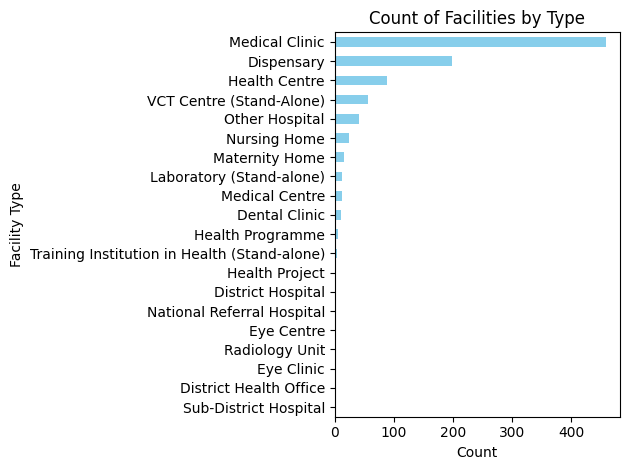

In [261]:
#Count of facilities by type
facility_type = df_nairobi.groupby('Type').agg({'Facility Code': 'count'}).reset_index()
facility_type.columns = ['Facility Type', 'Count' ]
facility_type_sorted=facility_type.sort_values(by='Count', ascending=True)

plt.figure(figsize=(16, 8))
facility_type_sorted.plot(x='Facility Type', y='Count', kind='barh', color='skyblue', legend=False)
plt.title('Count of Facilities by Type')
plt.xlabel('Count')
plt.ylabel('Facility Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 3. Hypothesis

From the preliminary EDA, we observe that there is a variation in health coverage across the constituencies. This leads to an assumptions that:

      There are significant disparities in the distribution of healthcare facilities accross Nairobi, with some subcounties being underserved compared to others, leading to unequal access to healthcare services.
To further assess the accessibility and explore the differences in the county, we calculate the number of facilities per 100,000 people to have a standard way of comparison.

We therefore make use of the population data together with the health facilities observations.

#### Refining the data
Because our census data is at subcounty level, we further tune our constituency columns to respective subcounties based on the Nairobi boundaries.

In [262]:
# mapping constituencies to respective subcounties
constituency_to_subcounty = {
    'Roysambu': 'Kasarani/Njiru',
    'Ruaraka': 'Kasarani/Njiru',
    'Kasarani': 'Kasarani/Njiru',
    'Embakasi North': 'Kasarani/Njiru',
    'Westlands': 'Westlands',
    'Dagoretti North': 'Westlands',
    'Embakasi South': 'Embakasi',
    'Embakasi East': 'Embakasi',
    'Embakasi West': 'Embakasi',
    'Embakasi Central': 'Embakasi',
    'Dagoretti South': 'Dagoretti',
    'Mathare': 'Mathare',
    'Kamukunji': 'Kamukunji',
    'Kibra': 'Kibra',
    'Starehe': 'Starehe',
    'Makadara': 'Makadara',
    "Lang'ata": "Lang'ata"

}

# subcounty column
df_nairobi.loc[:,'subcounty'] = df_nairobi['Constituency'].map(constituency_to_subcounty)

df_nairobi.head()

,Facility Code,Facility Name,County,District,Type,Owner,Constituency,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status,subcounty
1,19310,St Jude's Huruma Community Health Services,Nairobi,Mathare,Medical Clinic,Private Practice - Unspecified,Mathare,0.0,0.0,N,Y,Operational,Mathare
7,13043,7Kr Mrs Health Centre,Nairobi,Langata,Health Centre,Armed Forces,Lang'ata,14.0,0.0,Y,Y,Operational,Lang'ata
10,20346,AAR Adams Health Centre,Nairobi,Kibra,Medical Clinic,Private Practice - General Practitioner,Kibra,0.0,0.0,N,Y,Operational,Kibra
11,12861,AAR City Centre Clinic,Nairobi,Starehe,Medical Clinic,Private Enterprise (Institution),Starehe,0.0,0.0,N,Y,Operational,Starehe
12,16796,AAR Clinic Sarit Centre (Westlands),Nairobi,Westlands,Medical Clinic,Private Enterprise (Institution),Westlands,0.0,0.0,N,N,Operational,Westlands


Combining Kasarani and Njiru into one region was necessary in the population data so as to match the facilities data.

In [263]:
# Combinining Kasarani and Njiru into one subcounty for consistency
pop2.loc[pop2['Sub-county'].isin(['Kasarani', 'Njiru']), 'Sub-county'] = 'Kasarani/Njiru'

# Sum up the population values for Kasarani & Njiru
pop2 = pop2.groupby('Sub-county').sum().reset_index()

pop2

,Sub-county,Male,Female,Intersex,Total
0,Dagoretti,217651,216526,31.0,434208
1,Embakasi,492476,496270,62.0,988808
2,Kamukunji,136670,131599,7.0,268276
3,Kasarani/Njiru,688876,718194,68.0,1407138
4,Kibra,94199,91569,9.0,185777
5,Lang'ata,96698,100774,17.0,197489
6,Makadara,96369,93157,10.0,189536
7,Mathare,106522,100028,14.0,206564
8,Starehe,109173,101238,12.0,210423
9,Westlands,153818,155021,15.0,308854


#### Assessing Accesibility

<Figure size 1600x800 with 0 Axes>

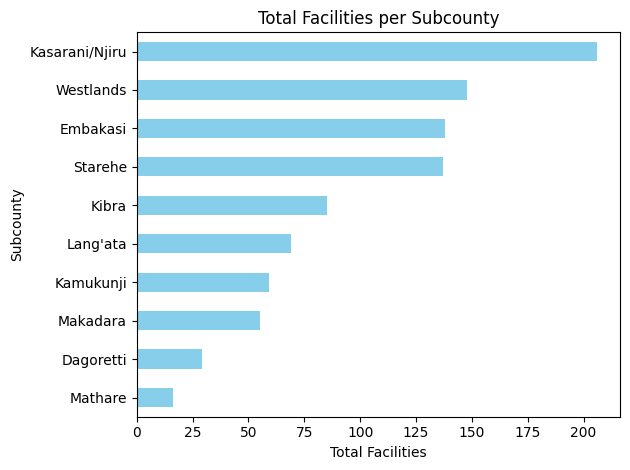

In [264]:
#Facilities by subcounty
subcounty_facilities = df_nairobi.groupby('subcounty').agg({'Facility Code': 'count'}).reset_index()
subcounty_facilities.columns = ['subcounty', 'Total Facilities' ]
subcounty_facilities_sorted=subcounty_facilities.sort_values(by='Total Facilities', ascending=True)

plt.figure(figsize=(16, 8))
subcounty_facilities_sorted.plot(x='subcounty', y='Total Facilities', kind='barh', color='skyblue', legend=False)
plt.title('Total Facilities per Subcounty')
plt.xlabel('Total Facilities')
plt.ylabel('Subcounty')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

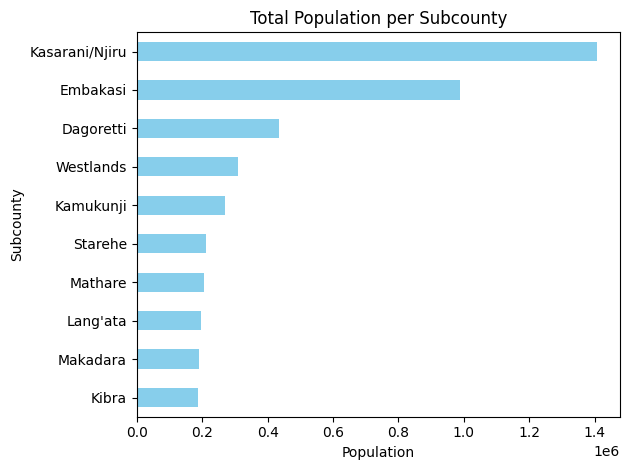

In [265]:
#pop2
pop2_sorted = pop2.sort_values(by='Total', ascending=True)

plt.figure(figsize=(16, 8))
pop2_sorted.plot(x='Sub-county', y='Total', kind='barh', color='skyblue', legend=False)
plt.title('Total Population per Subcounty')
plt.xlabel('Population')
plt.ylabel('Subcounty')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [266]:
#merging population and the subcounty data
merged_data = pd.merge(subcounty_facilities, pop2, left_on='subcounty', right_on='Sub-county')
merged_data

,subcounty,Total Facilities,Sub-county,Male,Female,Intersex,Total
0,Dagoretti,29,Dagoretti,217651,216526,31.0,434208
1,Embakasi,138,Embakasi,492476,496270,62.0,988808
2,Kamukunji,59,Kamukunji,136670,131599,7.0,268276
3,Kasarani/Njiru,206,Kasarani/Njiru,688876,718194,68.0,1407138
4,Kibra,85,Kibra,94199,91569,9.0,185777
5,Lang'ata,69,Lang'ata,96698,100774,17.0,197489
6,Makadara,55,Makadara,96369,93157,10.0,189536
7,Mathare,16,Mathare,106522,100028,14.0,206564
8,Starehe,137,Starehe,109173,101238,12.0,210423
9,Westlands,148,Westlands,153818,155021,15.0,308854


<Figure size 1600x800 with 0 Axes>

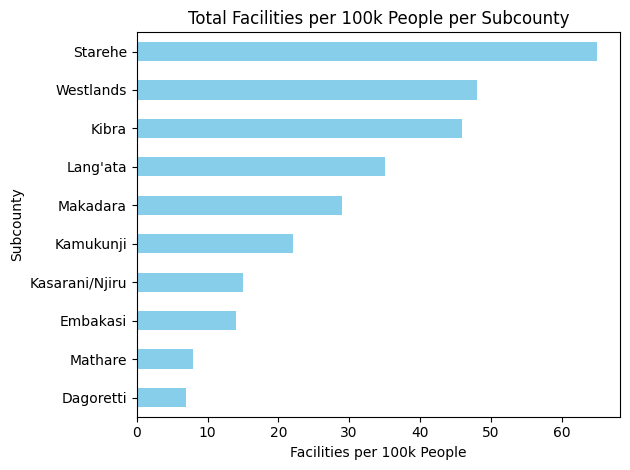

In [267]:
#facilities per 100,000 heads
merged_data['facilities_per_100k'] = (merged_data['Total Facilities'] / merged_data['Total']) * 100000
merged_data['facilities_per_100k'] = merged_data['facilities_per_100k'].round().astype(int)
merged_data_sorted = merged_data.sort_values(by='facilities_per_100k', ascending=True)

plt.figure(figsize=(16, 8))
merged_data_sorted.plot(x='Sub-county', y='facilities_per_100k', kind='barh', color='skyblue', legend=False)
plt.title('Total Facilities per 100k People per Subcounty')
plt.xlabel('Facilities per 100k People')
plt.ylabel('Subcounty')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

From the Analysis, we observe that:
- Healthcare coverage is not evenly ditributed across the Nairobi subcounties.
- A subcounty like Kasarani/Njiru records the highest number of facilities as well as the highest population, but in terms of coverage per 100k people, the count is very low.
- Dagoretti subcounty is among the top 3 populated areas, but has relatively the lowest health facilities per 100K people.

## 4. Export Data files 
Exporting files to tableau for presentation and recommendation.

In [268]:
nairobi_data = "C:\\Users\\Sharon\\Desktop\\DDI\\Nairobi-Facilities.xlsx"
with pd.ExcelWriter(nairobi_data, mode='w', engine='openpyxl') as writer:
     
    # original nairobi facilities data
    df_nairobi.to_excel(writer, sheet_name='nairobi_facilities', index=False)
    
    # subcounties data merged with population
    merged_data.to_excel(writer, sheet_name='subcounty-population-facilities', index=False)

In [269]:
pop2.to_excel("C:\\Users\\Sharon\\Desktop\\DDI\\sub-county_pop2.xlsx", index=False)

#### Shapefiles
This is an extra shape file containing geometry data of constituencies.
The specific data required is extracted for mapping.

In [270]:
#Load the shapefile
shapefile= gpd.read_file(r"C:\Users\Sharon\Downloads\ke_subcounty\ke_subcounty.shp")
shapefile = shapefile[shapefile['county']=='Nairobi']
shapefile

,country,provpcode,province,ctypcode,county,scpcode,subcounty,dhis2_id,geometry
13,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_279,Roysambu Sub County,j7GpbairCOi,"POLYGON ((36.89107 -1.21816, 36.89100 -1.21833..."
14,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_278,Kibra Sub County,LO5he3DtiFG,"MULTIPOLYGON (((36.79706 -1.31590, 36.79712 -1..."
21,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_276,Dagoretti South Sub County,sqNWYDHZZ6W,"POLYGON ((36.75588 -1.29595, 36.75619 -1.29648..."
28,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_275,Dagoretti North Sub County,CcTr4bcVGAG,"POLYGON ((36.74978 -1.27497, 36.74981 -1.27489..."
57,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_282,Embakasi South Sub County,aDp1odOWYC1,"POLYGON ((36.88930 -1.30628, 36.88941 -1.30654..."
83,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_284,Embakasi Central Sub County,XvpLXU47BKs,"POLYGON ((36.91963 -1.27727, 36.91952 -1.27730..."
88,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_287,Makadara Sub County,wwROy3Qkwin,"POLYGON ((36.88690 -1.29772, 36.88690 -1.29772..."
92,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_285,Embakasi East Sub County,gD4xxgDGJ4Y,"POLYGON ((36.89964 -1.32327, 36.89957 -1.32321..."
153,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_281,Ruaraka Sub County,Cc8uEFkzfVf,"POLYGON ((36.90024 -1.24245, 36.90013 -1.24253..."
162,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_290,Mathare Sub County,gh2kzpOFCeF,"POLYGON ((36.85516 -1.26591, 36.85443 -1.26591..."


In [271]:
#function to clean the subcounty column
def subcounty_cleanup(shapefile, column):
  shapefile[column] = shapefile[column].str.replace('Sub County', "")
  shapefile[column] = shapefile[column].str.strip()
  shapefile[column] = shapefile[column].str.replace('Langata', "Lang'ata")
  return shapefile

subcounty_cleanup(shapefile, 'subcounty')
shapefile

,country,provpcode,province,ctypcode,county,scpcode,subcounty,dhis2_id,geometry
13,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_279,Roysambu,j7GpbairCOi,"POLYGON ((36.89107 -1.21816, 36.89100 -1.21833..."
14,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_278,Kibra,LO5he3DtiFG,"MULTIPOLYGON (((36.79706 -1.31590, 36.79712 -1..."
21,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_276,Dagoretti South,sqNWYDHZZ6W,"POLYGON ((36.75588 -1.29595, 36.75619 -1.29648..."
28,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_275,Dagoretti North,CcTr4bcVGAG,"POLYGON ((36.74978 -1.27497, 36.74981 -1.27489..."
57,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_282,Embakasi South,aDp1odOWYC1,"POLYGON ((36.88930 -1.30628, 36.88941 -1.30654..."
83,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_284,Embakasi Central,XvpLXU47BKs,"POLYGON ((36.91963 -1.27727, 36.91952 -1.27730..."
88,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_287,Makadara,wwROy3Qkwin,"POLYGON ((36.88690 -1.29772, 36.88690 -1.29772..."
92,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_285,Embakasi East,gD4xxgDGJ4Y,"POLYGON ((36.89964 -1.32327, 36.89957 -1.32321..."
153,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_281,Ruaraka,Cc8uEFkzfVf,"POLYGON ((36.90024 -1.24245, 36.90013 -1.24253..."
162,Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_290,Mathare,gh2kzpOFCeF,"POLYGON ((36.85516 -1.26591, 36.85443 -1.26591..."


In [272]:
# mapping constituencies to subcounties
shapefile['subcounty_modified'] = shapefile['subcounty'].map(constituency_to_subcounty)

# Merging the constituencieswith the same subcounties into one geometry
shapefile_modified = shapefile.dissolve(by='subcounty_modified')
shapefile_modified

,geometry,country,provpcode,province,ctypcode,county,scpcode,subcounty,dhis2_id
subcounty_modified,,,,,,,,,
Dagoretti,"POLYGON ((36.75588 -1.29595, 36.75619 -1.29648...",Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_276,Dagoretti South,sqNWYDHZZ6W
Embakasi,"POLYGON ((36.92037 -1.35188, 36.92320 -1.35557...",Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_282,Embakasi South,aDp1odOWYC1
Kamukunji,"POLYGON ((36.85224 -1.28954, 36.85224 -1.28954...",Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_288,Kamukunji,qoLIT7y5f5c
Kasarani/Njiru,"POLYGON ((37.08106 -1.23752, 37.08897 -1.23369...",Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_279,Roysambu,j7GpbairCOi
Kibra,"MULTIPOLYGON (((36.79844 -1.31287, 36.79844 -1...",Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_278,Kibra,LO5he3DtiFG
Lang'ata,"MULTIPOLYGON (((36.89087 -1.41498, 36.89086 -1...",Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_277,Lang'ata,aTGYlhEw2Xx
Makadara,"POLYGON ((36.88690 -1.29772, 36.88690 -1.29772...",Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_287,Makadara,wwROy3Qkwin
Mathare,"POLYGON ((36.85516 -1.26591, 36.85443 -1.26591...",Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_290,Mathare,gh2kzpOFCeF
Starehe,"POLYGON ((36.85446 -1.31600, 36.85446 -1.31600...",Kenya,KEN_1_8,Nairobi,KEN_2_47,Nairobi,KEN_3_289,Starehe,nKHlZyN0lt9


In [273]:
#save to file
gdf=gpd.GeoDataFrame(shapefile)
gdf.to_file("C:\\Users\\Sharon\\Desktop\\DDI\\GEO2.shp")

gdf2=gpd.GeoDataFrame(shapefile_modified)
gdf2.to_file("C:\\Users\\Sharon\\Desktop\\DDI\\shapefile_modified.shp")

C:\Users\Sharon\AppData\Local\Temp\ipykernel_6048\3519604416.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("C:\\Users\\Sharon\\Desktop\\DDI\\GEO2.shp")
C:\Users\Sharon\AppData\Local\Temp\ipykernel_6048\3519604416.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf2.to_file("C:\\Users\\Sharon\\Desktop\\DDI\\shapefile_modified.shp")
